In [1]:
import pandas as pd
import nltk #procesamiento de palabras
from nltk.corpus import stopwords
import gensim #pip install gensim sirve separa texto 
import re #sirve para concatenar texto


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #pip install wordcloud
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
filename ='C:/Users/F32740/OneDrive - Kimberly-Clark/Documents/U/Análisis de datos/Tarea Scrappy/Vacunas_tarea.xlsx'
#filename = '/Users/cmoralesal/Documents/Carlos Morales/BAC-comentarios/clasificacion_1.xlsx'
df = pd.read_excel(filename)
df.head(5)

,status_id,screen_name,text
0,8.320000e+17,COVID_19,Cada día más requisitos! Y la gente aplaudiend...
1,8.330000e+17,COVID_19,Estupideces estupideces y más estupideces!!!
2,8.340000e+17,COVID_19,Y luego van a seguir con la tercera cuarta qui...
3,8.340000e+17,COVID_19,Hp más necios
4,8.340000e+17,COVID_19,Sigan borregos creyéndose todo los que les dic...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   status_id    142 non-null    float64
 1   screen_name  142 non-null    object 
 2   text         142 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [4]:
black_list = ['más', 'mas', 'unir', 'paises', 'pais', 'espa', 'no', 'os', 'a', 'compa','si', 'gt','mexico','hoy','unam','t','i','the'] #agregar palabras a la lista negra
def cleaner(word): #limpia todas las las palabras no alfanumericas, convierte en miniscula, quita puntuación, etc
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
  word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
  word = re.sub(r'CR', 'cr', word)
  word = re.sub(r'\#\.', '', word)
  word = re.sub(r'\n', '', word)
  word = re.sub(r',', '', word)
  word = re.sub(r'\-', ' ', word)
  word = re.sub(r'\.{3}', ' ', word)
  word = re.sub(r'a{2,}', 'a', word)
  word = re.sub(r'é{2,}', 'é', word)
  word = re.sub(r'i{2,}', 'i', word)
  word = re.sub(r'ja{2,}', 'ja', word) 
  word = re.sub(r'á', 'a', word)
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word)  
  word = re.sub('[^a-zA-Z]', ' ', word)
  list_word_clean = []
  for w1 in word.split(" "): #coloca en minuscula las palabras
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

    
  bigram_list = bigram[list_word_clean]
  out_text = " ".join(bigram_list) #unifica todas las palabras por bigramas
  return out_text

In [5]:
len(df.text.to_list())

142

In [6]:
%%time
bigram = gensim.models.Phrases(df.text.to_list()) #separa las palabras eb comas
print(bigram)

Phrases<655 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
Wall time: 9.97 ms


In [7]:
bigram[df.text.to_list()[100].split()]

['El',
 'gobierno',
 'no',
 'sabe',
 'ni',
 'donde',
 'está',
 'parado...Dejen',
 'de',
 'meter',
 'miedo']

In [8]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F32740\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish')) #quita palabras comunes del español
adicional_palabras=set(black_list) #aplica el stopword
stopwords = stop.union(adicional_palabras) #une el stop de palabras mas la black lista

In [10]:
%%time
df['text'] = df['text'].apply(cleaner)

Wall time: 7.98 ms


In [11]:
df.head(10)

,status_id,screen_name,text
0,8.320000e+17,COVID_19,cada dia requisitos gente aplaudiendo feliz
1,8.330000e+17,COVID_19,estupideces estupideces estupideces
2,8.340000e+17,COVID_19,luego van seguir tercera cuarta quita despues ...
3,8.340000e+17,COVID_19,hp necios
4,8.340000e+17,COVID_19,sigan borregos creyendose dicen charlie zepolin
5,8.350000e+17,COVID_19,quot
6,8.350000e+17,COVID_19,cosa ocurrira enero nunca simplemente derecho ...
7,8.360000e+17,COVID_19,vacuna influenza pone cada
8,8.360000e+17,COVID_19,tampoco completa cn cn vacunas sirven
9,8.370000e+17,COVID_19,puro comunismo corea norte


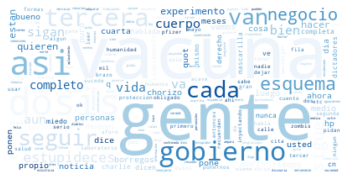

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output



#text = df[df.screen_name=='lopezobrador_'].screen_name.tolist() #filtrar candidato
pal = ' '.join(df['text']) #texto chorreado

wordcloud = WordCloud(stopwords = stopwords,
                      collocations=True,
                      colormap='Blues',
                      background_color="white").generate(str(pal))

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
#fig.savefig("nube_palabras.png", dpi=900)

In [13]:
### creando el diccionario de las palabras 
texto_diccionario = wordcloud.process_text(pal) #procesar el texto a diccionario ('josefina': 5, 'vazquez': 1, 'debe': 13)
# ordenar el diccionario
frecuencia={k: v for k, v in sorted(texto_diccionario.items(),reverse=True, key=lambda item: item[1])} #ordena el diccionario

print(list(frecuencia.items())[:10])


[('vacuna', 16), ('gente', 13), ('dosis', 12), ('asi', 10), ('gobierno', 10), ('tercera', 9), ('cada', 7), ('van', 7), ('seguir', 7), ('esquema', 7)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

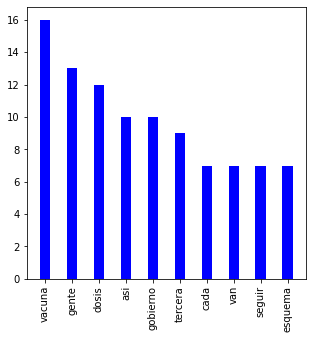

In [14]:
palabras = list(frecuencia.keys())[:10] #obtengo las palbras
cantidad = list(frecuencia.values())[:10] #obtengo los valores

fig = plt.figure(figsize = (5, 5)) 
  
# creando el mapa
plt.bar(palabras, cantidad, color ='blue',  
        width = 0.4)
plt.xticks(rotation=90)

In [1]:
#pip install sentiment-analysis-spanish

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install keras tensorflow

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=17f4616b321799303e1384e6c4965c5fc5a172d889893181da79d984b49bd14e
  Stored in directory: c:\users\f32740\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sentiment_analysis_spanish import sentiment_analysis

In [18]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish() #invoco la función
print(sentiment.sentiment("excelente"))

0.9633894245446962


C:\Users\F32740\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\F32740\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [46]:
print(sentiment.sentiment("me parece terrible esto que me estás diciendo"))

2.1830853580533075e-06


In [47]:
X = ["Son malaaaaa onda esos vecinossss", 'el BIFE estuvo EXCELENTE',
     '!!!! Quien te pensas que sos ??Ahora andate!!y no te quiero ver mas..!',
     'que asco', 'Pésimo servicio', 'desgracia']

for e in X:
    print(e + ' ==> %.5f' % sentiment.sentiment(e))

Son malaaaaa onda esos vecinossss ==> 0.28471
el BIFE estuvo EXCELENTE ==> 0.97012
!!!! Quien te pensas que sos ??Ahora andate!!y no te quiero ver mas..! ==> 0.00025
que asco ==> 0.30300
Pésimo servicio ==> 0.00341
desgracia ==> 0.19840


In [21]:
def senti(x):
    return sentiment.sentiment(x)

In [48]:
df['senti_puntuacion'] = df['text'].apply(senti)

In [49]:
df.head()

,status_id,screen_name,text,senti_puntuacion,sentimiento
0,8.320000e+17,COVID_19,cada dia requisitos gente aplaudiendo feliz,2.056859e-01,Negativo
1,8.330000e+17,COVID_19,estupideces estupideces estupideces,4.978923e-01,Neutro
2,8.340000e+17,COVID_19,luego van seguir tercera cuarta quita despues ...,4.302336e-07,Negativo
3,8.340000e+17,COVID_19,hp necios,4.978923e-01,Neutro
4,8.340000e+17,COVID_19,sigan borregos creyendose dicen charlie zepolin,5.446046e-02,Negativo


<AxesSubplot:>

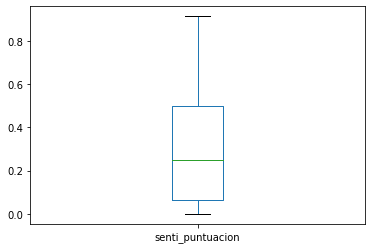

In [24]:
df.boxplot(column =['senti_puntuacion'], grid = False)

In [25]:
df[["senti_puntuacion"]].describe()

,senti_puntuacion
count,1.420000e+02
mean,2.833143e-01
std,2.155950e-01
min,4.302336e-07
25%,6.577632e-02
50%,2.471902e-01
75%,4.978923e-01
max,9.129429e-01


In [38]:
df['sentimiento'] = df['senti_puntuacion'].apply(lambda rating : "Positivo" if rating >= 0.50 else("Neutro" if rating >= 0.45 else "Negativo"))

In [39]:
df.head(500)

,status_id,screen_name,text,senti_puntuacion,sentimiento
0,8.320000e+17,COVID_19,cada dia requisitos gente aplaudiendo feliz,2.056859e-01,Negativo
1,8.330000e+17,COVID_19,estupideces estupideces estupideces,4.978923e-01,Neutro
2,8.340000e+17,COVID_19,luego van seguir tercera cuarta quita despues ...,4.302336e-07,Negativo
3,8.340000e+17,COVID_19,hp necios,4.978923e-01,Neutro
4,8.340000e+17,COVID_19,sigan borregos creyendose dicen charlie zepolin,5.446046e-02,Negativo
...,...,...,...,...,...
137,8.790000e+17,COVID_19,borregos sigan haciendo fila,2.715113e-01,Negativo
138,8.790000e+17,COVID_19,ve vos,2.575964e-01,Negativo
139,8.800000e+17,COVID_19,asi acorralar usar mascarilla vacunados metern...,3.710615e-01,Negativo
140,8.800000e+17,COVID_19,pac idiotas,4.978923e-01,Neutro


In [40]:
df.groupby(["sentimiento"]).size()

sentimiento
Negativo    94
Neutro      35
Positivo    13
dtype: int64

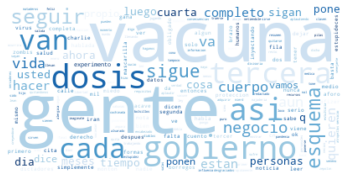

In [41]:
#wordcloud negativo

text3_Neg = df[df.sentimiento.str.contains("Negativo")] #filtrar sentimiento
text2_negativo= ' '.join(text3_Neg[str('text')]) #texto chorreado

wordcloud = WordCloud(stopwords = stopwords,
                      collocations=True,
                      colormap='Blues',
                      background_color="white").generate(str(text2_negativo))

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
#fig.savefig("nube_palabras.png", dpi=900)

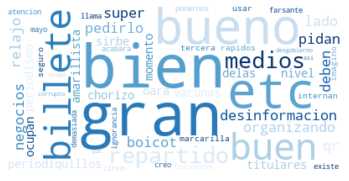

In [42]:
text3_Pos = df[df.sentimiento.str.contains("Positivo")] #filtrar sentimiento
text2_positivo= ' '.join(text3_Pos[str('text')]) #texto chorreado

wordcloud = WordCloud(stopwords = stopwords,
                      collocations=True,
                      colormap='Blues',
                      background_color="white").generate(str(text2_positivo))

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()
#fig.savefig("nube_palabras.png", dpi=900)

<AxesSubplot:ylabel='text'>

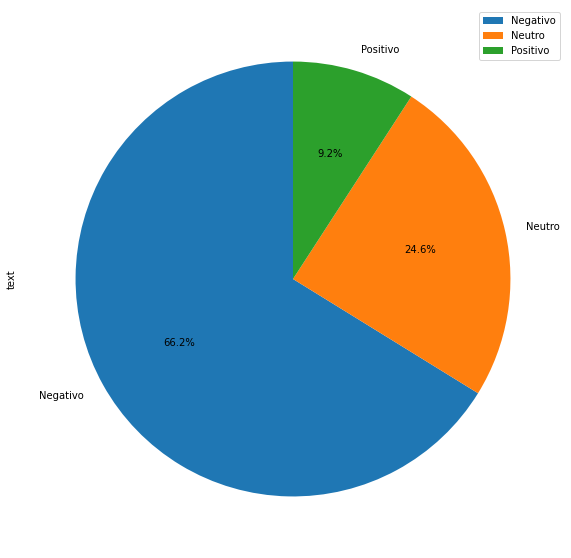

In [50]:
df.groupby(['sentimiento']).count().plot(kind='pie', y='text',startangle=90,figsize=(15,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='sentimiento'>

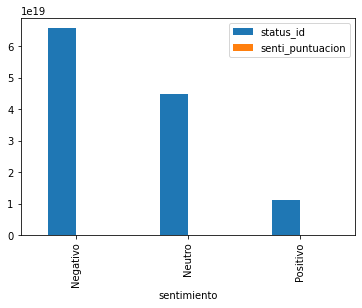

In [32]:
df.groupby('sentimiento').sum().plot(kind='bar')
#surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')

In [33]:
palabras = re.sub(r'[^\w\s]', '', pal).split()

In [34]:
palabras[:10] #convierto palabras en lista

['cada',
 'dia',
 'requisitos',
 'gente',
 'aplaudiendo',
 'feliz',
 'estupideces',
 'estupideces',
 'estupideces',
 'luego']

In [35]:
(pd.Series(nltk.ngrams(palabras, 3)).value_counts())[:10]

(toda, inocente, poniendo)           1
(laboratorio, payasada, ponernos)    1
(diran, tercera, mismo)              1
(ve, vos, asi)                       1
(etc, etc, asi)                      1
(luego, van, seguir)                 1
(tener, dosis, asi)                  1
(docis, medio, vulgar)               1
(dia, estupideces, inventa)          1
(cuento, seguir, llenando)           1
dtype: int64

In [36]:
bigramas_series = (pd.Series(nltk.ngrams(palabras, 3)).value_counts())[:12]

<AxesSubplot:>

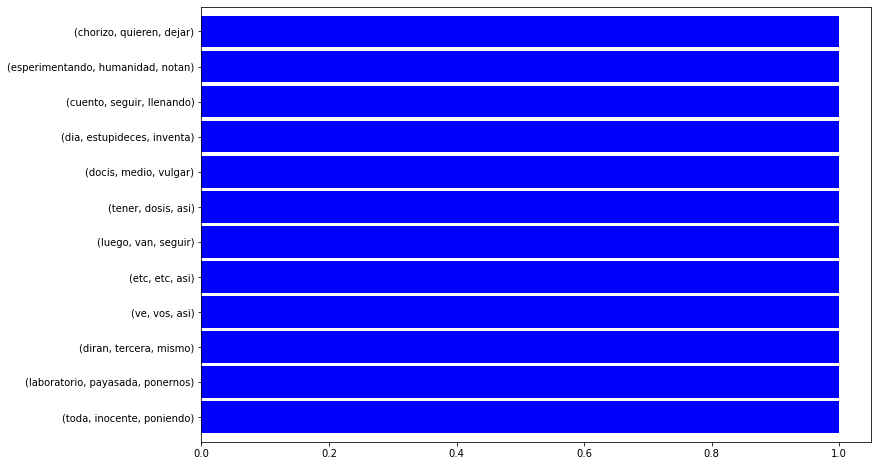

In [37]:
bigramas_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))